In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

```markdown
# Data Cleaning and Preprocessing
```

In [152]:
covid_df= pd.read_csv('PK COVID-19.csv')


Checking for missing values:

In [153]:
covid_df.isna().sum()

Date              3
Cases             3
Deaths            3
Recovered         3
Travel_history    3
Province          3
City              3
dtype: int64

Removing missing values:

In [154]:
covid_df.dropna(inplace=True)

In [155]:
covid_df.isna().sum()

Date              0
Cases             0
Deaths            0
Recovered         0
Travel_history    0
Province          0
City              0
dtype: int64

Data Types Conversions:

In [156]:
covid_df['Date'] = pd.to_datetime(covid_df['Date'])
covid_df['Date'] = covid_df['Date'].dt.strftime('%m/%d/%Y')

In [157]:
covid_df['Deaths'].dtype
covid_df['Recovered'].dtype
covid_df['Cases'].dtype

dtype('float64')

```markdown
# Total Number of Cases, Recoveries, Deaths ,Recovery Rate and Death Rate
```

```markdown
# Cases Analysis
```

In [158]:
#total cases
print(covid_df['Cases'].sum())

8415.0


In [159]:
#Cases Per Month
covid_df["Date"] = pd.to_datetime(covid_df["Date"], dayfirst=True)

covid_df['Month'] = covid_df["Date"].dt.to_period('M')

/var/folders/6n/ndsjwkks0kn541czwk8ff3hc0000gn/T/ipykernel_1488/2238324576.py:2: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  covid_df["Date"] = pd.to_datetime(covid_df["Date"], dayfirst=True)


In [160]:

monthy_cases=covid_df.groupby(covid_df['Month'])['Cases'].sum()
monthy_cases

Month
2020-02       5.0
2020-03    1965.0
2020-04    6445.0
Freq: M, Name: Cases, dtype: float64

In [161]:
covid_df['Cases Per Month']=covid_df['Month'].map(monthy_cases)


In [162]:
for month,cases in monthy_cases.items():
    print(f"{month}: {cases}")

2020-02: 5.0
2020-03: 1965.0
2020-04: 6445.0


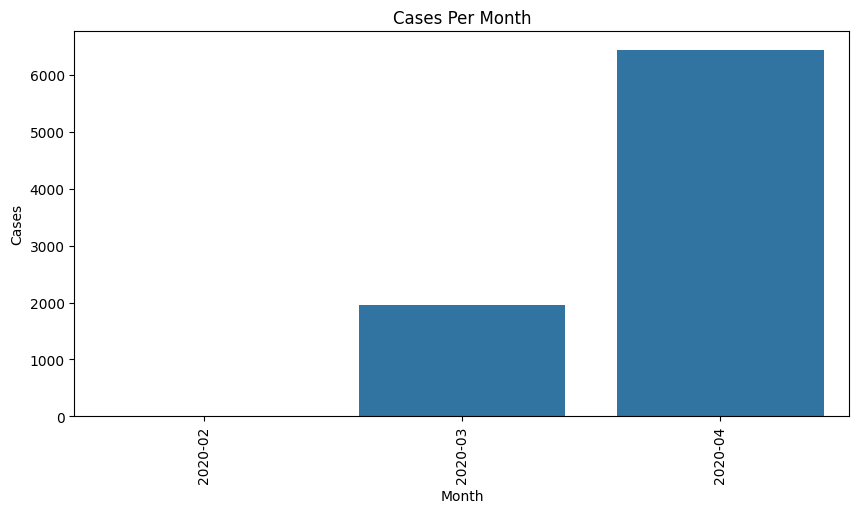

In [163]:
plt.figure(figsize=(10,5))
sns.barplot(x='Month',y='Cases Per Month',data=covid_df)
plt.xticks(rotation=90)
plt.title('Cases Per Month')
plt.xlabel('Month')
plt.ylabel('Cases')
plt.show()

```markdown
It is also worth noting that the increase in cases during these months can be attributed to traveling, as people tend to visit northern areas during this time, potentially contributing to the spread of the virus.
From the bar plot above, it is evident that the number of cases in the second month (February 2020) is significantly lower compared to the subsequent months. Specifically, February only recorded 5 cases, which is why its bar is not prominently visible in the plot. This highlights the initial phase of the outbreak, with cases rapidly increasing in the following months.
```

```markdown
### Cases in Provinces
```

In [164]:
covid_df.groupby(covid_df['Province'])['Cases'].sum()

Province
Azad Jummu Kashmir                      49.0
Baluchistan                            415.0
Federal Administration Tribal Area      46.0
Gilgit-Baltistan                       263.0
Islamabad Capital Territory            176.0
Khyber Pakhtunkhwa                    1076.0
Punjab                                3777.0
Sindh                                 2611.0
khyber Pakhtunkhwa                       2.0
Name: Cases, dtype: float64

As it is shown above, there is ambiguity as Khyber Pakhtunkhwa appears 2 times. Let's clean the data a little more for duplicate provinces.

In [165]:
covid_df['Province'] = covid_df['Province'].str.strip().str.lower()


In [166]:
print(sorted(covid_df['Province'].unique()))


['azad jummu kashmir', 'baluchistan', 'federal administration tribal area', 'gilgit-baltistan', 'islamabad capital territory', 'khyber pakhtunkhwa', 'punjab', 'sindh']


 the duplication issue has been resolved.

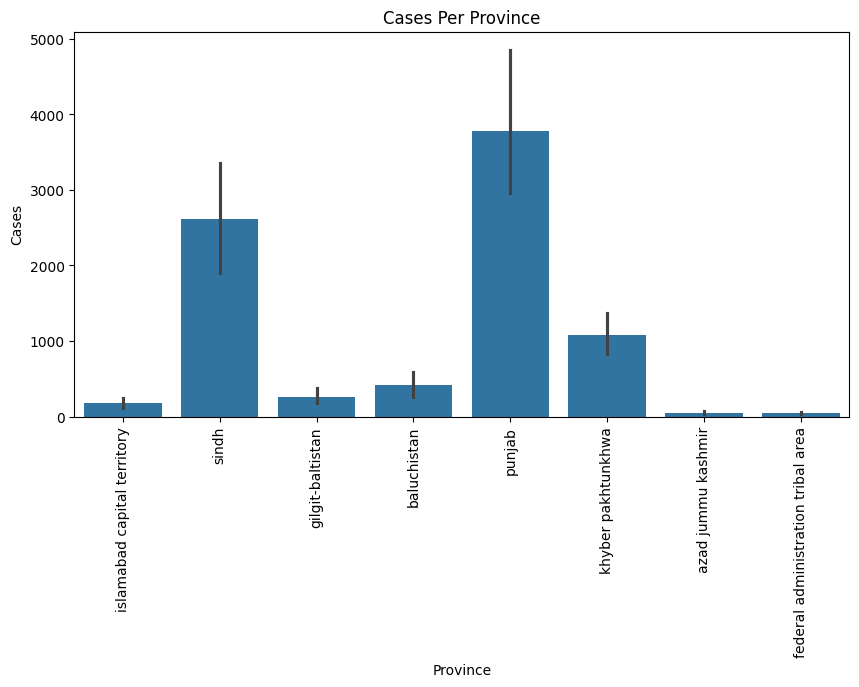

In [169]:
plt.figure(figsize=(10,5))
sns.barplot(x='Province',y='Cases',data=covid_df,estimator=sum)
plt.xticks(rotation=90)
plt.title('Cases Per Province')
plt.xlabel('Province')
plt.ylabel('Cases')
plt.show()

```markdown
### Population and COVID-19 Cases Analysis

From the data, it is evident that provinces with larger populations tend to have a higher number of COVID-19 cases. The ranking of provinces based on the total number of cases is as follows:
1. **Punjab**: Punjab, being the most populous province, has the highest number of cases. This aligns with the expectation that a larger population increases the likelihood of higher case counts due to greater population density and interactions.

2. **Sindh**: Sindh ranks second in terms of COVID-19 cases. Karachi, the largest city in Sindh, contributes significantly to the case count due to its high population density and urban nature.

3. **Khyber Pakhtunkhwa (KPK)**: KPK comes third in the ranking. While its population is smaller compared to Punjab and Sindh, it still shows a significant number of cases.

This analysis highlights the correlation between population size and the number of COVID-19 cases, emphasizing the need for targeted interventions in densely populated areas to control the spread of the virus. Additionally, it is observed that the increase in cases in northern areas is influenced by travel, as people from Punjab and Sindh frequently visit these regions.


Lets visualize it using heatmaps

In [173]:
heatmap_data=covid_df.pivot_table(index='Province', columns='Month', values='Cases', aggfunc='sum')

<Axes: xlabel='Month', ylabel='Province'>

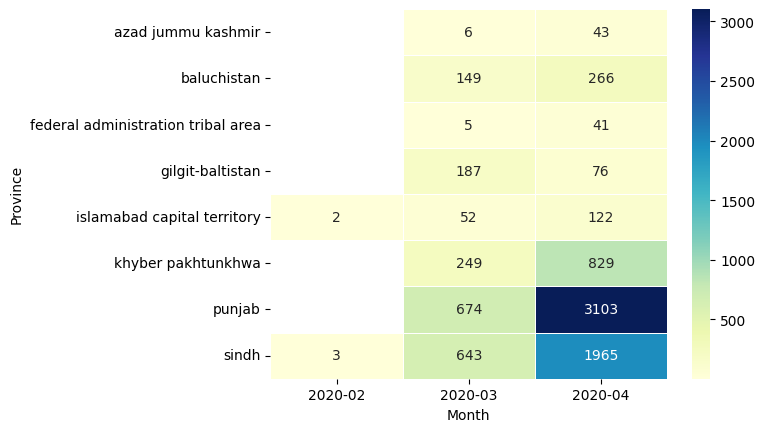

In [177]:
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f',linewidths=0.5)

Know look at each city of punjab

In [184]:
punjab_df = covid_df[covid_df['Province'] == 'punjab'].groupby('City')['Cases'].sum().reset_index()

In [187]:
punjab_df

,City,Cases
0,Attock,15.0
1,Bahawal Nagar,21.0
2,Bahawalpur,54.0
3,Bhakhar,63.0
4,Chakwal,5.0
5,Chiniot,8.0
6,Dera Ghazi Khan,247.0
7,Faisalabad,77.0
8,Gujranwala,85.0
9,Gujrat,151.0


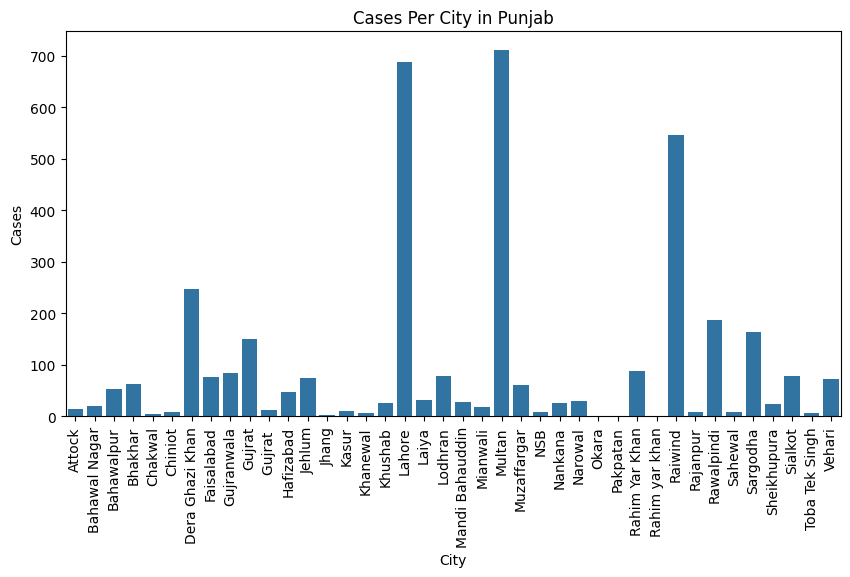

In [193]:
plt.figure(figsize=(10,5))
sns.barplot(x='City',y='Cases',data=punjab_df)
plt.xticks(rotation=90)
plt.title('Cases Per City in Punjab')
plt.xlabel('City')
plt.ylabel('Cases')
plt.show()

```markdown
### Analysis of COVID-19 Cases in Punjab Cities

The bar plot visualizing the number of COVID-19 cases in cities of Punjab reveals the following insights:

1. **Cities with High Case Counts**:
    - **Lahore**: With 688 cases, Lahore has the highest number of cases. Being the most populous city in Punjab, its dense population and urban nature contribute significantly to the spread of the virus.
    - **Multan**: Multan follows with 712 cases, another densely populated city with significant urban activity.
    - **Raiwind**: Raiwind records 546 cases, likely influenced by large gatherings such as religious congregations.

2. **Remote and Rural Areas**:
    - Cities like **Dera Ghazi Khan** (247 cases) and **Rawalpindi** (187 cases) also show a significant number of cases. These areas, while not as densely populated as Lahore, may face challenges such as limited healthcare access and delayed government interventions.

3. **Correlation Between Population and Cases**:
    - The data suggests that cities with higher populations, such as Lahore and Multan, tend to have more cases due to increased human interactions and urban density.
    - On the other hand, rural and remote areas with limited government access also show notable case counts, indicating the need for improved healthcare infrastructure and outreach in these regions.

This analysis highlights the dual challenge of managing COVID-19 in both densely populated urban centers and underserved rural areas. Targeted interventions are essential to address the unique needs of these regions.
```

```markdown
### Analysis of Travel History for COVID-19 Cases
```

In [ ]:
travel_df =covid_df.groupby('Travel_history')['Cases'].sum()


In [203]:
travel_df

Travel_history
China                         2.0
Dubai                         1.0
India                         2.0
International Passenger      30.0
Iran/Taftan                1051.0
Jail                        101.0
KSA                           6.0
Local - Covid Relative        1.0
Local - Social Contact     4313.0
Syria                         7.0
Tableeghi Jamaat           1018.0
Tableegi Jamaat              19.0
UK                            5.0
USA                           1.0
Unknown                    1858.0
Name: Cases, dtype: float64

There is again duplication lets remove it

In [205]:
covid_df['Travel_history'] = covid_df['Travel_history'].str.strip().str.lower()

In [207]:
covid_df['Travel_history'] = covid_df['Travel_history'].replace({
    'iran/taftan': 'Iran',
    'uk': 'United Kingdom',
    'usa': 'United States',
    'ksa': 'Saudi Arabia',
    'dubai': 'United Arab Emirates',
    'tableeghi jamaat': 'Tableeghi Jamaat',
    'tableegi jamaat': 'Tableeghi Jamaat',  # Correcting spelling inconsistency
    'jail': 'Prison',
    'china': 'China',
    'syria': 'Syria',
    'india': 'India',
    'local - social contact': 'Local Transmission',
    'local - covid relative': 'Local Transmission',
    'international passenger': 'International Passenger',
    'unknown': 'Unknown'
})


In [208]:
covid_df['Travel_history'].unique()

array(['China', 'Iran', 'Unknown', 'Syria', 'United Kingdom',
       'Local Transmission', 'United States', 'Saudi Arabia',
       'International Passenger', 'United Arab Emirates',
       'Tableeghi Jamaat', 'Prison', 'India'], dtype=object)

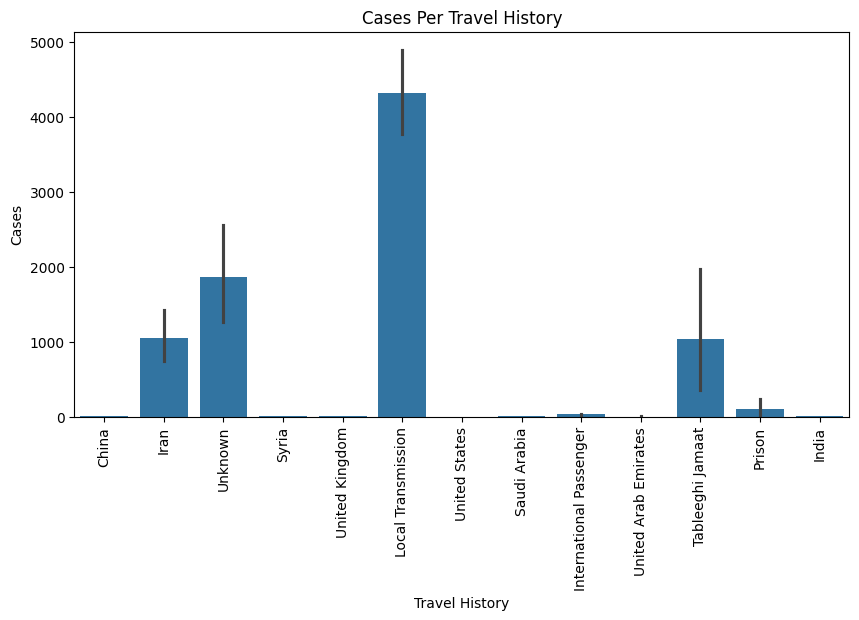

In [209]:
plt.figure(figsize=(10,5))
sns.barplot(x='Travel_history',y='Cases',data=covid_df,estimator=sum)
plt.xticks(rotation=90)
plt.title('Cases Per Travel History')
plt.xlabel('Travel History')
plt.ylabel('Cases')
plt.show()


```markdown
### Analysis of Travel History and COVID-19 Cases

The bar plot visualizing the relationship between travel history and the number of COVID-19 cases reveals the following insights:

1. **Local Transmission**:
    - The majority of cases are attributed to local transmission, with over 4,300 cases. This indicates that community spread played a significant role in the outbreak.

2. **Tableeghi Jamaat**:
    - A substantial number of cases, approximately 1,018, are linked to the Tableeghi Jamaat, highlighting the impact of large gatherings on the spread of the virus.

3. **Iran/Taftan**:
    - Around 1,051 cases are associated with travel history to Iran/Taftan, emphasizing the role of international travel in the early stages of the pandemic.

4. **Unknown Sources**:
    - A significant number of cases, approximately 1,858, have an unknown travel history, which could indicate gaps in contact tracing or unreported travel.

5. **Other Travel Histories**:
    - Cases linked to other travel histories, such as the UK, USA, KSA, and China, are relatively low compared to local transmission and Tableeghi Jamaat.

This analysis underscores the importance of controlling community spread and monitoring large gatherings to mitigate the impact of the pandemic.
```

```markdown
### Analysis of Recoveries from COVID-19
```

In [210]:
covid_df['Recovered'].sum()

np.float64(2135.0)

### Monthly Recoveries from COVID-19

This section analyzes the number of recoveries reported each month, providing insights into the recovery trends over time.

In [214]:
monthly_recoveries=covid_df.groupby(covid_df['Month'])['Recovered'].sum()
monthly_recoveries

Month
2020-02       0.0
2020-03     122.0
2020-04    2013.0
Freq: M, Name: Recovered, dtype: float64

In [216]:
covid_df['Recovered per month']=covid_df['Month'].map(monthly_recoveries)

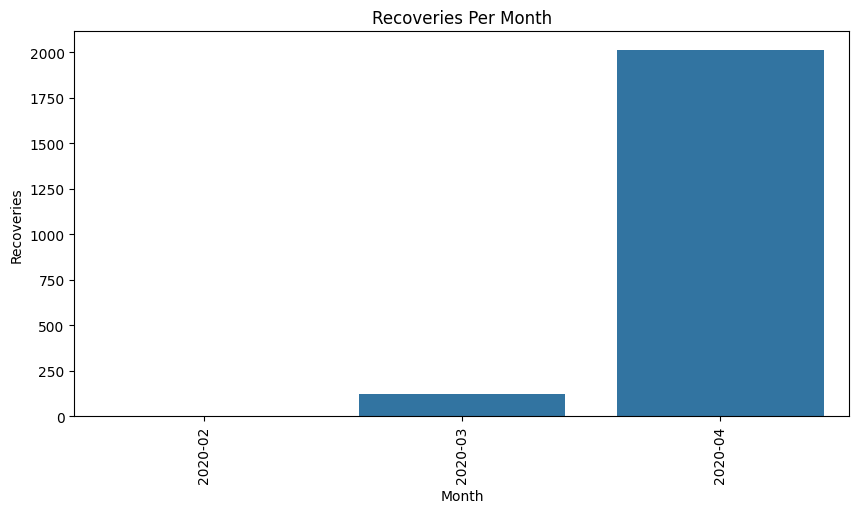

In [217]:
plt.figure(figsize=(10,5))
sns.barplot(x='Month',y='Recovered per month',data=covid_df)
plt.xticks(rotation=90)
plt.title('Recoveries Per Month')
plt.xlabel('Month')
plt.ylabel('Recoveries')
plt.show()




The bar chart above illustrates the number of COVID-19 recoveries recorded each month. As shown, recoveries remained minimal in February 2020 and March 2020, with only a slight increase observed in March. However, there was a significant surge in April 2020, where recoveries exceeded 2,000. This sharp rise indicates either an improvement in recovery efforts, increased testing and reporting, or the natural progression of the disease cycle. The data highlights a turning point in the pandemic recovery phase during the early months of 2020.

```markdown
### Number of Recoveries in Provinces
```

In [218]:
covid_df.groupby(covid_df['Province'])['Recovered'].sum()

Province
azad jummu kashmir                      1.0
baluchistan                           167.0
federal administration tribal area     11.0
gilgit-baltistan                      195.0
islamabad capital territory            15.0
khyber pakhtunkhwa                    196.0
punjab                                685.0
sindh                                 865.0
Name: Recovered, dtype: float64

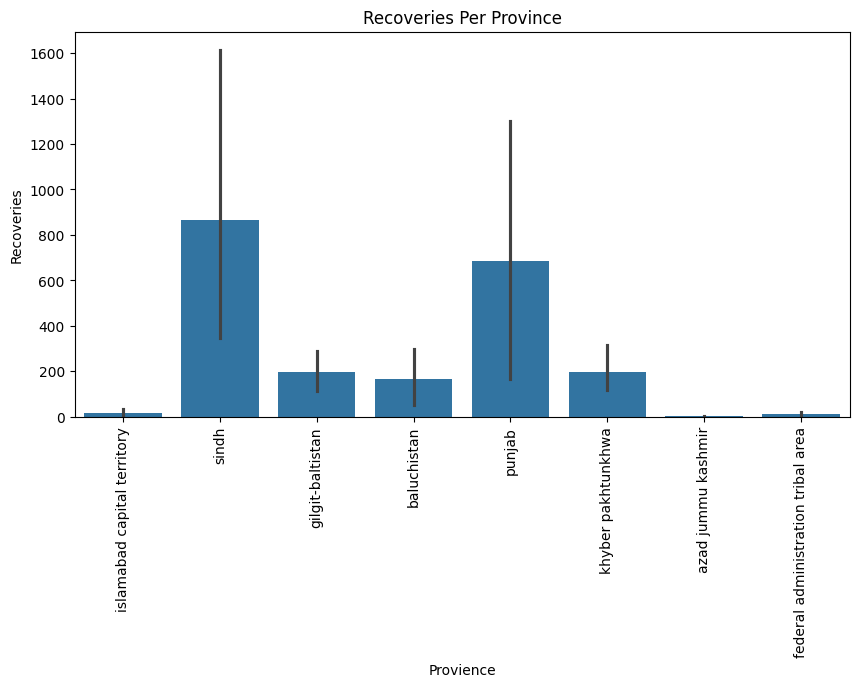

In [221]:
plt.figure(figsize=(10,5))
sns.barplot(x='Province',y='Recovered',data=covid_df,estimator=sum)
plt.xticks(rotation=90)
plt.xlabel("Provience")
plt.ylabel('Recoveries')
plt.title('Recoveries Per Province')
plt.show()

The bar chart titled "Recoveries Per Province" displays the number of COVID-19 recoveries reported across various provinces of Pakistan. Each bar represents a different province, and the height of the bar indicates the number of recoveries, while the black error bars represent the possible variation or uncertainty in the data.

From the graph, it is evident that Sindh and Punjab have the highest number of recoveries, with Sindh slightly ahead. Despite having high case numbers, both provinces managed to report a significant number of recoveries, reflecting effective medical treatment and patient management.

Gilgit-Baltistan, Baluchistan, and Khyber Pakhtunkhwa show a moderate number of recoveries, which aligns with their moderate case counts.

On the other hand, Islamabad Capital Territory, Azad Jammu Kashmir, and Federal Administration Tribal Area show very low recovery counts, which may be due to fewer cases, delayed reporting, or limited healthcare infrastructure.

Overall, the graph highlights the variation in recovery performance among different provinces and provides a visual representation of the healthcare response to COVID-19 across the country.



```markdown
### CASES VS RECOVERIES
```

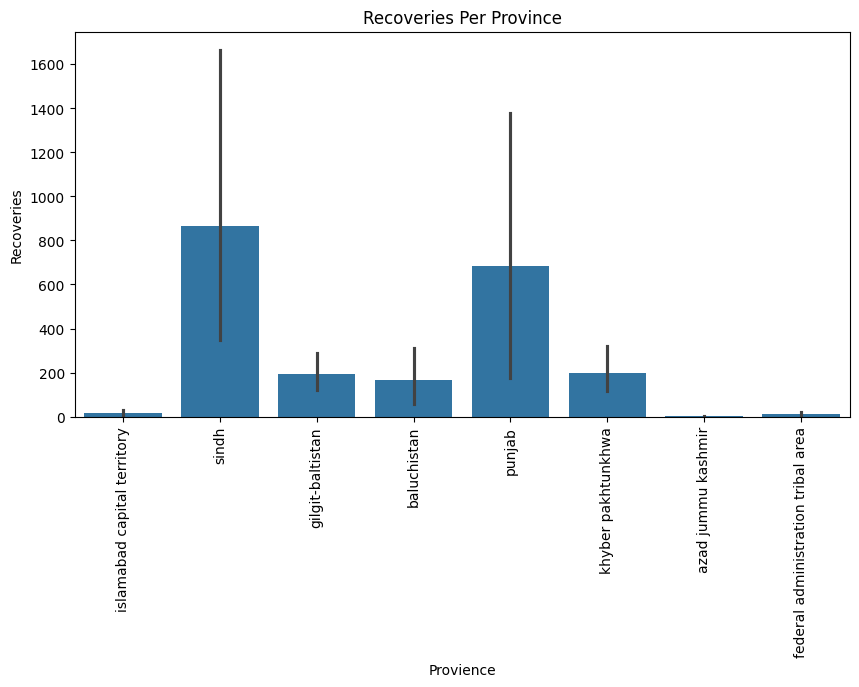

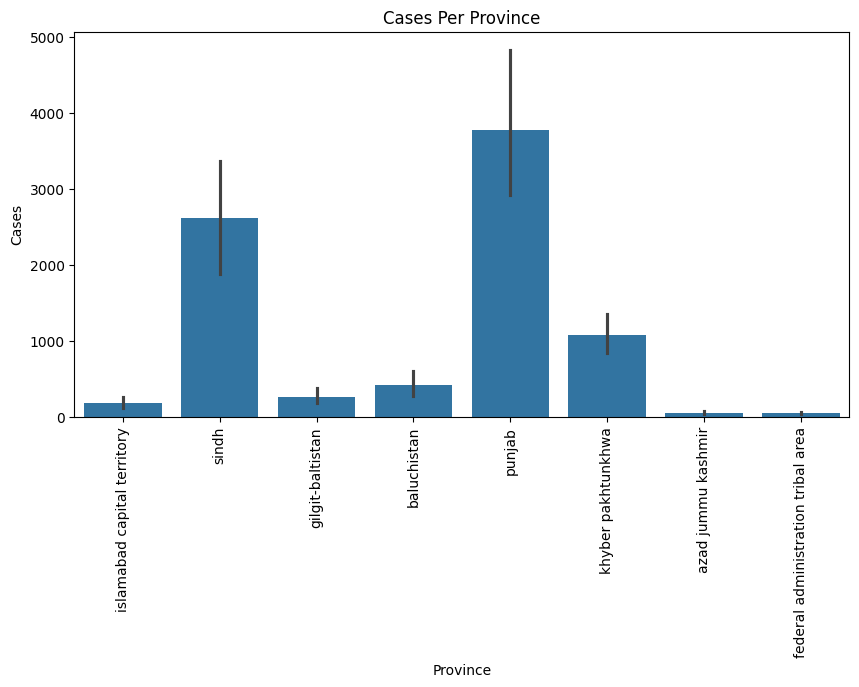

In [220]:
#plot for Recoveries
plt.figure(figsize=(10,5))
sns.barplot(x='Province',y='Recovered',data=covid_df,estimator=sum)
plt.xticks(rotation=90)
plt.xlabel("Provience")
plt.ylabel('Recoveries')
plt.title('Recoveries Per Province')
plt.show()
#Plot for cases
plt.figure(figsize=(10,5))
sns.barplot(x='Province',y='Cases',data=covid_df,estimator=sum)
plt.xticks(rotation=90)
plt.title('Cases Per Province')
plt.xlabel('Province')
plt.ylabel('Cases')
plt.show()

✅ COVID-19 Cases vs Recoveries by Province (Pakistan) Best Performing Province:

Gilgit-Baltistan performed relatively better compared to others.

It had low cases and a high proportion of recoveries, indicating effective control and response.

📈 Highest Number of Cases:

Punjab had the highest number of cases, followed by Sindh.

However, Punjab also had a significant number of recoveries, suggesting that despite a high outbreak, recovery efforts were strong.

📉 Lowest Recovery Rate (Relatively):

Islamabad Capital Territory and Azad Jammu Kashmir showed very low recoveries compared to their reported cases, which might indicate delayed recovery tracking or issues in healthcare response.

⚖️ Other Observations:

Baluchistan and Khyber Pakhtunkhwa had moderate cases and decent recovery numbers.

Federal Administration Tribal Area reported very few cases and very few recoveries, possibly due to limited data or low testing.



### RECOVERIES IN CITY PUNJAB

In [222]:
punjab_recoveries = covid_df[covid_df['Province'] == 'punjab'].groupby('City')['Recovered'].sum().reset_index()
punjab_recoveries

,City,Recovered
0,Attock,0.0
1,Bahawal Nagar,4.0
2,Bahawalpur,4.0
3,Bhakhar,0.0
4,Chakwal,1.0
5,Chiniot,0.0
6,Dera Ghazi Khan,415.0
7,Faisalabad,0.0
8,Gujranwala,1.0
9,Gujrat,4.0


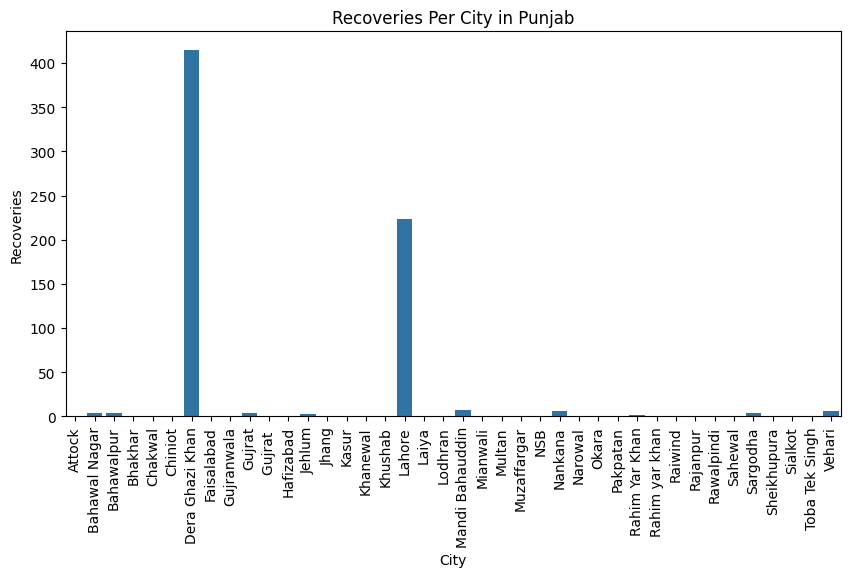

In [223]:
plt.figure(figsize=(10,5))
sns.barplot(x='City',y='Recovered',data=punjab_recoveries)
plt.xticks(rotation=90)
plt.title('Recoveries Per City in Punjab')
plt.xlabel('City')
plt.ylabel('Recoveries')
plt.show()

Explanation of the Graph: Recoveries Per City in Punjab
The bar chart titled "Recoveries Per City in Punjab" provides a visual representation of the number of COVID-19 recoveries reported in various cities of Punjab. Each bar corresponds to a city, and the height of the bar indicates the total recoveries in that city.

Key Observations:


Dera Ghazi Khan:

This city has the highest number of recoveries, with over 400 recoveries reported. This could be attributed to effective healthcare measures or a higher number of cases leading to more recoveries.


Lahore:

Lahore, being the most populous city in Punjab, also shows a significant number of recoveries. Its urban nature and healthcare infrastructure likely contributed to this.
Other Cities:

Most other cities have relatively low recovery counts, which could be due to fewer reported cases or limited healthcare resources.
Disparity in Recoveries:

The graph highlights a stark disparity in recoveries among cities, with a few cities like Dera Ghazi Khan and Lahore dominating the recovery numbers while others remain minimal.
This analysis underscores the importance of targeted healthcare interventions in cities with higher case counts and recoveries. It also reflects the varying healthcare capacities across different regions of Punjab.



### DEATHS ANALYSIS

In [29]:
print(covid_df['Deaths'].sum())

168.0
